In [0]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import re
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

In [0]:
from google.colab import files
files.upload()

Saving testing.csv to testing (1).csv
Saving training.csv to training.csv


{'testing.csv': b'class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9\r\nd ,67,51,68,115,69,111,136,31,67,47.7,-0.27,29.16,-16.32,-42.93,-49.01,-58.09,0.71,-9.17,-18.27,-1.8,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11\r\ns ,67,28,51,99,50,97,82,26,59,47.93,23.77,47.98,1.76,-23.88,-34.41,-2.89,4.32,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.2,-3.41,-6.57\r\ns ,63,26,50,95,49,91,81,26,57,53.09,25.72,48.33,7.16,-22.89,-28.4,-0.69,4.16,-0.44,-17.64,-1.81,-4.7,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85\r\nd ,63,42,63,97,66,108,111,28,59,52.41,9.76,35.69,4.44,-39.89,-45.42,-31.33,2.24,-2.34,-20.2,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52\r\ns ,46,27

In [0]:
testing = pandas.read_csv('testing.csv')
training = pandas.read_csv('training.csv')

In [0]:
print(training.head())

  class  b1  b2  ...  pred_minus_obs_S_b7  pred_minus_obs_S_b8  pred_minus_obs_S_b9
0    d   39  36  ...               -22.50                -5.20                -7.86
1    h   84  30  ...               -23.41                -8.87               -10.83
2    s   53  25  ...               -19.97                -4.10                -7.07
3    s   59  26  ...               -27.10                -7.99               -10.81
4    d   57  49  ...               -22.83                -2.74                -5.84

[5 rows x 28 columns]


In [0]:
testing.isnull().sum()

class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64

In [0]:
# remove null values
testing = testing.replace(to_replace =["?"], value = np.nan ) 
training = training.replace(to_replace =["?"], value = np.nan ) 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


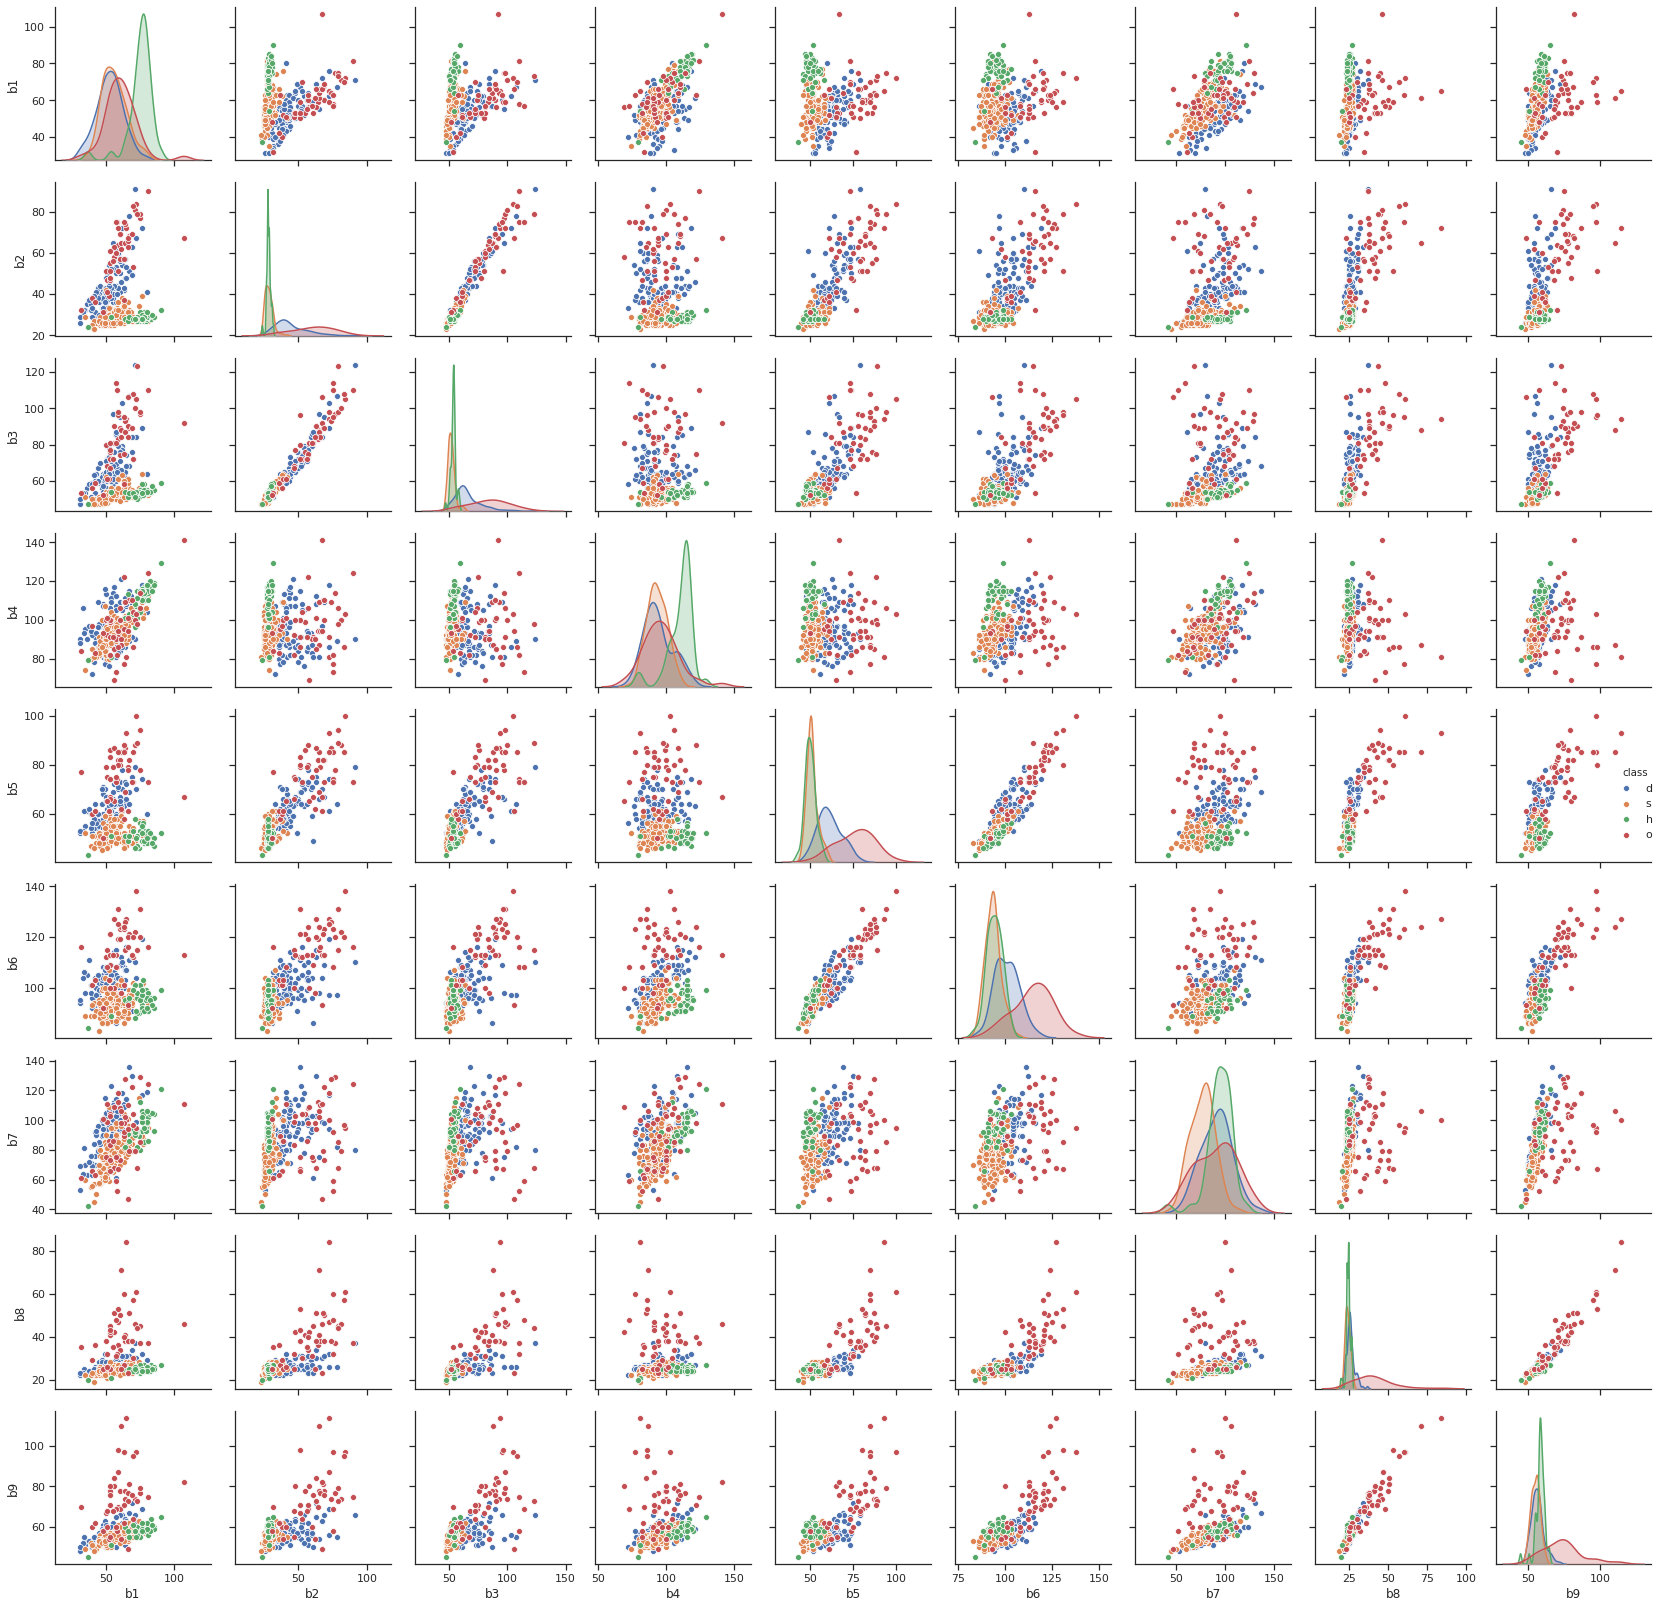

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cols = ['class', 'b1', 'b2', 'b3','b4','b5','b5','b6','b7','b8','b9']

cols = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
sns.pairplot(testing[cols], hue="class", size = 2.5)

plt.tight_layout()
plt.show()

In [0]:
#target Variable
training['class'].value_counts()

s     59
d     54
h     48
o     37
Name: class, dtype: int64

Testing and Training is divided in the form of 62% and 38%

Testing : 62%
Training : 38%

In [0]:
training.shape


(198, 28)

In [0]:
testing.shape

(325, 28)

In [0]:
testing.head(5)
y_testing = testing.iloc[:,0]
X_testing = testing.iloc[:,1:]
y_training = training.iloc[:,0]
X_training = training.iloc[:,1:]

In [0]:
X_training


,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,55,61,90,75,55,91,84,24,54,57.14,-13.14,2.87,20.93,-30.36,-31.88,-6.73,5.47,1.28,-20.84,-1.47,-5.72,-18.73,-1.18,-5.22,-17.81,-1.28,-3.87
194,66,69,93,90,63,100,99,25,57,45.97,-20.93,0.18,6.34,-38.24,-40.56,-21.73,4.74,-1.50,-19.64,-1.45,-5.60,-17.03,-1.08,-5.15,-16.77,-1.46,-4.03
195,79,30,55,115,51,96,109,25,59,35.40,22.19,41.20,-3.31,-25.44,-36.80,-28.94,5.27,-3.66,-22.40,-3.91,-6.61,-36.29,-2.13,-5.77,-23.32,-2.09,-4.13
196,69,27,53,106,47,90,87,24,55,35.81,19.86,36.67,-18.69,-23.24,-33.71,-18.59,4.87,-0.88,-13.32,0.16,-2.39,-7.12,0.02,-2.06,-10.04,-0.74,-2.88


In [0]:
X_testing

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,67,51,68,115,69,111,136,31,67,47.70,-0.27,29.16,-16.32,-42.93,-49.01,-58.09,0.71,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,67,28,51,99,50,97,82,26,59,47.93,23.77,47.98,1.76,-23.88,-34.41,-2.89,4.32,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,63,26,50,95,49,91,81,26,57,53.09,25.72,48.33,7.16,-22.89,-28.40,-0.69,4.16,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,63,42,63,97,66,108,111,28,59,52.41,9.76,35.69,4.44,-39.89,-45.42,-31.33,2.24,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,46,27,50,83,51,90,76,26,56,68.54,24.27,48.21,16.37,-24.89,-27.66,2.19,4.93,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,55,56,72,91,79,113,86,35,68,62.20,-3.86,26.38,12.12,-54.09,-53.39,-5.91,-5.65,-12.86,-23.08,-0.08,-3.46,-27.52,-1.04,-4.73,-22.85,-1.49,-4.10
321,69,49,76,91,52,91,92,25,57,34.95,-1.55,15.12,5.44,-27.45,-32.64,-21.49,4.32,-2.36,-11.47,-0.40,-3.74,-16.90,-0.78,-4.15,-11.13,-1.48,-3.55
322,49,26,48,107,59,104,62,22,53,69.86,27.76,52.66,-5.12,-33.88,-44.00,19.16,7.36,2.32,-23.48,1.44,-1.59,-26.98,-1.36,-4.81,-24.50,-2.53,-4.97
323,55,26,52,92,55,98,65,23,56,63.64,27.89,49.05,7.68,-29.90,-37.98,15.52,6.23,-0.77,-23.74,1.27,-1.30,-25.53,-1.21,-4.70,-24.39,-2.21,-4.72


In [0]:
print(numpy.shape(X_training))
print(numpy.shape(y_training))
print(numpy.shape(X_testing))
print(numpy.shape(y_testing))

(198, 27)
(198,)
(325, 27)
(325,)


KNN model

Test Accuracy: 0.84


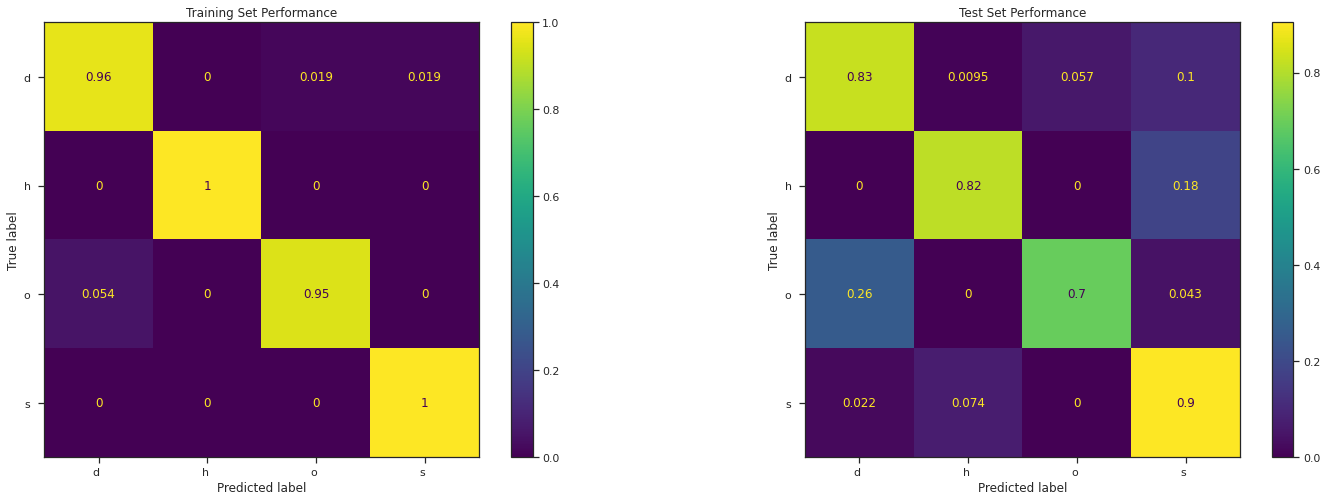

In [0]:
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance');
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Test Set Performance');
    pred = model.predict(X_test)
    print('Test Accuracy: ' + str(sum(pred == Y_test)/len(Y_test)))

cknn = KNeighborsClassifier(n_neighbors=3)
cknn.fit(X_training, y_training)
eval_model(cknn, X_training, y_training, X_testing, y_testing)

Test Accuracy: 0.8184615384615385


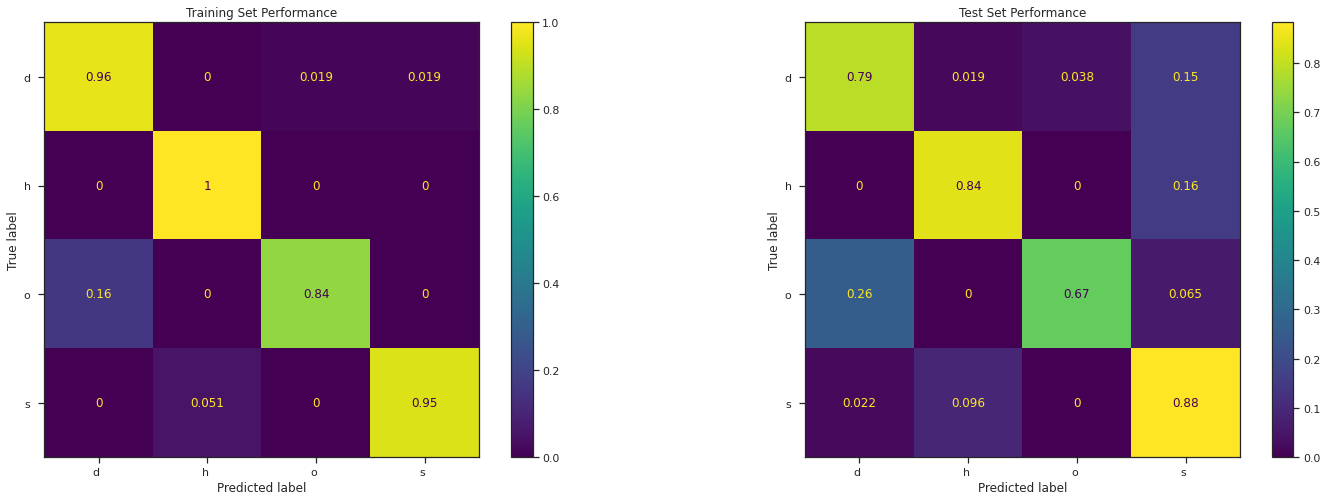

In [0]:
cknn = KNeighborsClassifier(n_neighbors=10)
cknn.fit(X_training, y_training)
eval_model(cknn, X_training, y_training, X_testing, y_testing)

Test Accuracy: 0.8276923076923077


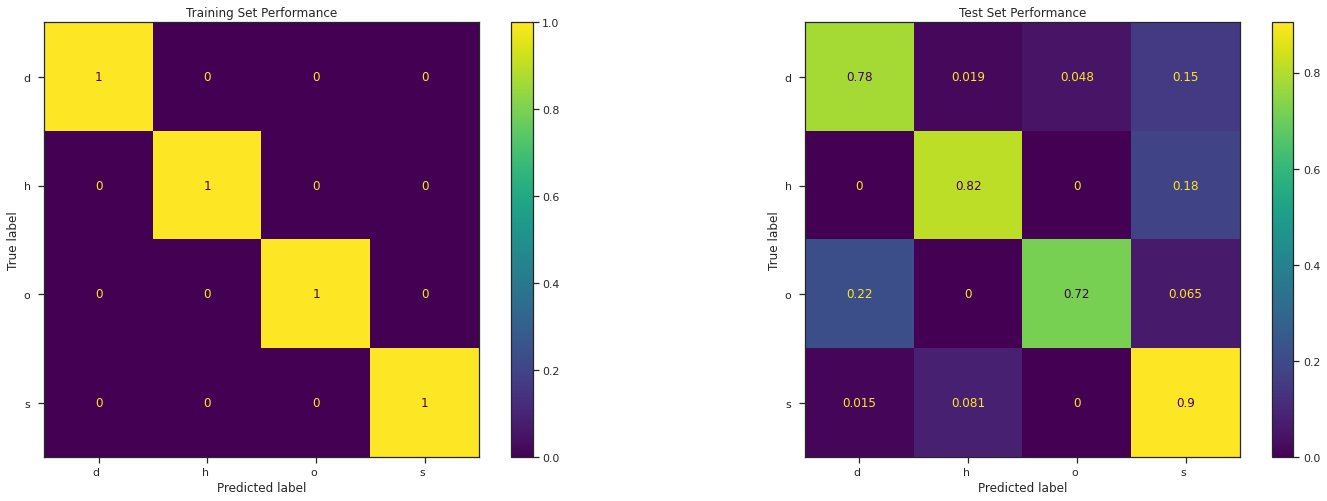

In [0]:
cknn = KNeighborsClassifier(n_neighbors=10, weights='distance')
cknn.fit(X_training, y_training)
eval_model(cknn, X_training, y_training, X_testing, y_testing)

 Multi-Class SVMs

Test Accuracy: 0.8153846153846154


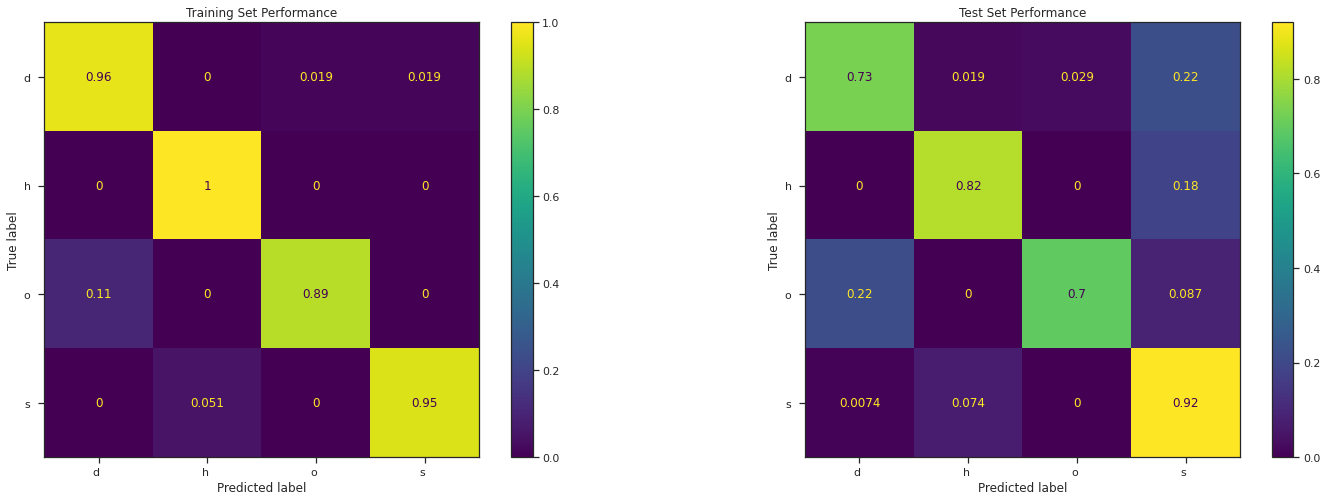

In [0]:
svm = SVC()
svm.fit(X_training, y_training)
eval_model(svm, X_training, y_training, X_testing, y_testing)

Test Accuracy: 0.8153846153846154


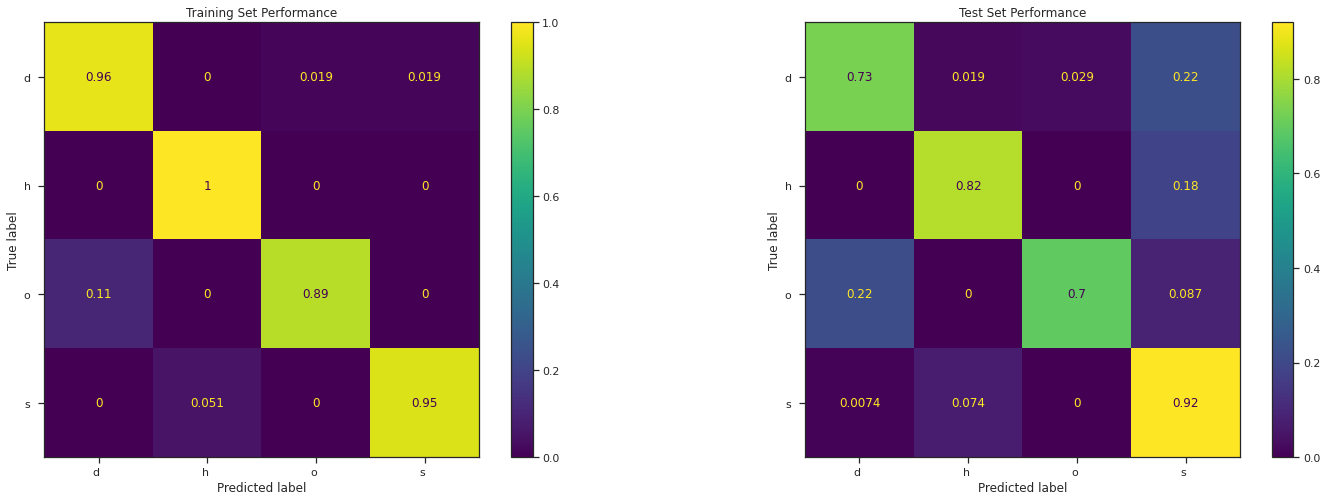

In [0]:
nu_svm = NuSVC(nu=0.15)
svm.fit(X_training, y_training)
eval_model(svm, X_training, y_training, X_testing, y_testing)

Test Accuracy: 0.8369230769230769


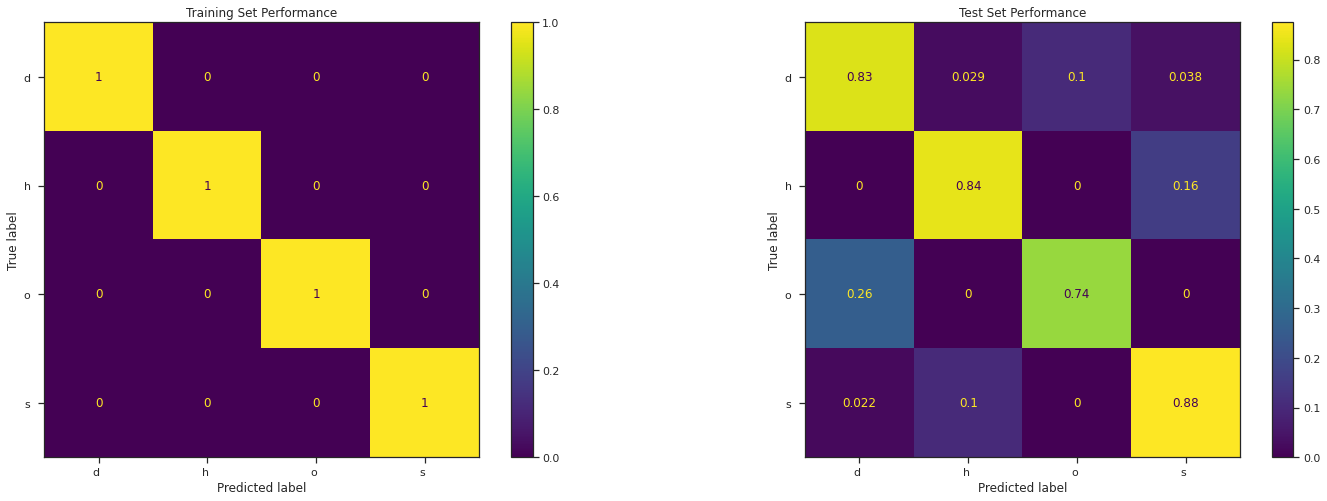

In [0]:
svm = SVC(C = numpy.inf, kernel='linear')
svm.fit(X_training, y_training)
eval_model(svm, X_training, y_training, X_testing, y_testing)

One vs All


Test Accuracy: 0.7938461538461539


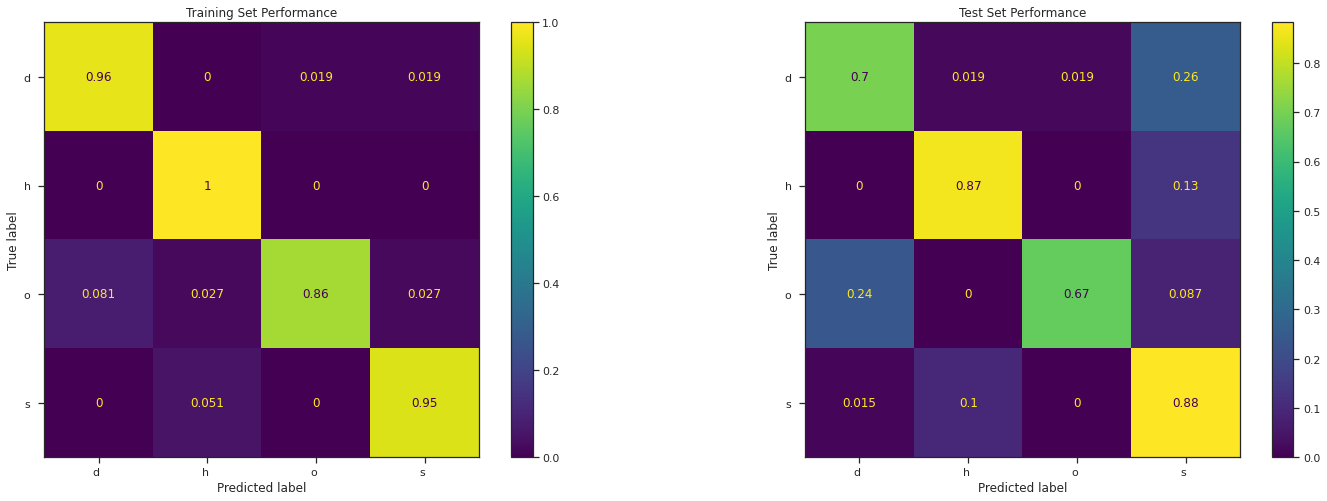

In [0]:
onevsall_svm = OneVsRestClassifier(SVC())
onevsall_svm.fit(X_training, y_training)
eval_model(onevsall_svm , X_training, y_training, X_testing, y_testing)

Test Accuracy: 0.8153846153846154


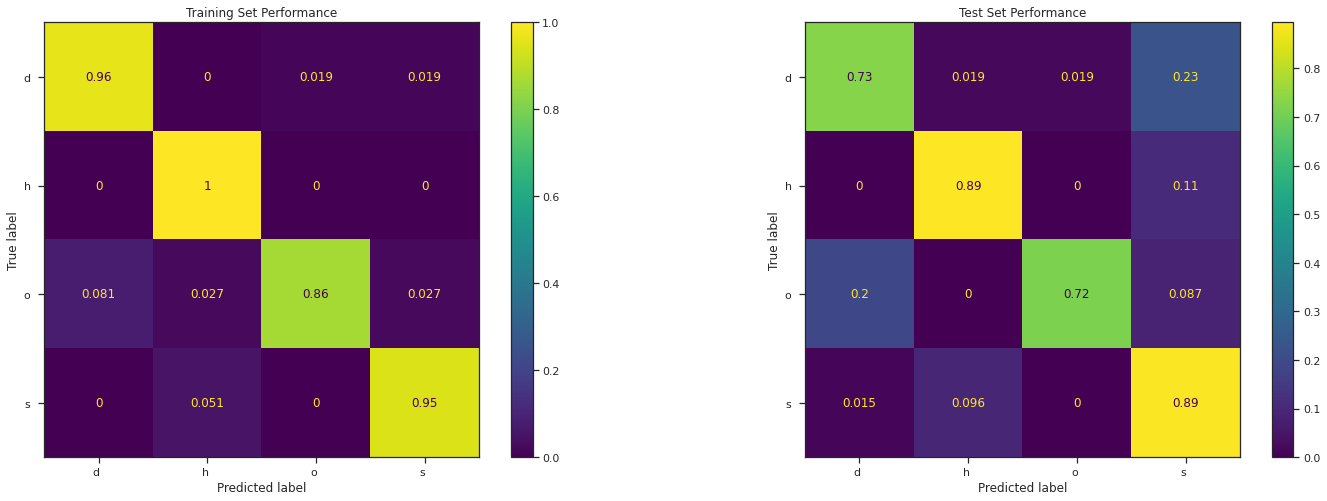

In [0]:
onevsall_svm = OneVsRestClassifier(SVC(class_weight='balanced'))
onevsall_svm.fit(X_training, y_training)
eval_model(onevsall_svm, X_training, y_training, X_testing, y_testing)